# Four-point model

In [4]:
############################################## Imports/Method def. ########################################

import numpy as np
import math
import matplotlib.pyplot as plt

def distance(x1, y1, x2, y2):
  return math.sqrt(math.pow(x1-x2, 2) + math.pow(y1-y2, 2))

In [5]:
distance(0, 0, 2, 2)

2.8284271247461903

In [8]:
################################################### Parameter Initialization #######################################

numPeople = 4

dimX = 10
dimY = 10

px1 = 0
py1 = 10

px2 = 2
py2 = 2

px3 = 9
py3 = 3

px4 = 7
py4 = 7

peopleX = [px1, px2, px3, px4]
peopleY = [py1, py2, py3, py4]
peopleSize = [70, 30, 10, 50]
sizeMarker = ['$70$', '$30$', '$10$', '$50$']

3.1, 7.1000000000000005


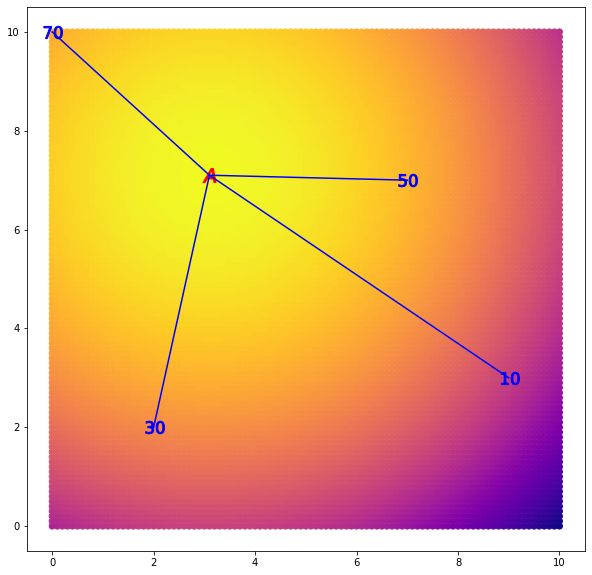

In [27]:
################################## Calculating Best Position for 1st Player ########################################

mini = 10000
bestX = 0
bestY = 0

increment = 0.1

xVals = np.arange(0.0, dimX+increment, increment)
yVals = np.arange(0.0, dimY+increment, increment) 

xiA = []
yiA = []
sumsA = []

for x in xVals:
    for y in yVals:
        
        total = 0
        
        for i in range(len(peopleX)):
            d = distance(x, y, peopleX[i], peopleY[i])
            total = total + d*d*peopleSize[i]
        
        xiA.append(x)
        yiA.append(y)
        sumsA.append(round(total))
        
        if (total < mini):
            mini = total
            bestXA = x;
            bestYA = y;

print (str(bestXA) + ", " + str(bestYA))

#################################################### Plotting #####################################################

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

neg_sums = [i*(-1) for i in sumsA]
normalized_sums = [round(i/min(sumsA),2) for i in sumsA]

for i in range (numPeople):
    x = [bestXA, peopleX[i]]
    y = [bestYA, peopleY[i]]
    
    plt.plot(x, y, 'b-')

ax.scatter(xiA, yiA, c=neg_sums, cmap="plasma")

# for i, txt in enumerate(normalized_sums):
#     ax.annotate(txt, (xiA[i], yiA[i]))

for i in range (len(peopleSize)):
    plt.scatter(peopleX[i], peopleY[i], marker=sizeMarker[i], s = 400, c = 'b')
        
plt.scatter(bestXA, bestYA, marker = '$A$', s = 200, c = 'r')

    
plt.show()

3.4000000000000004, 7.5


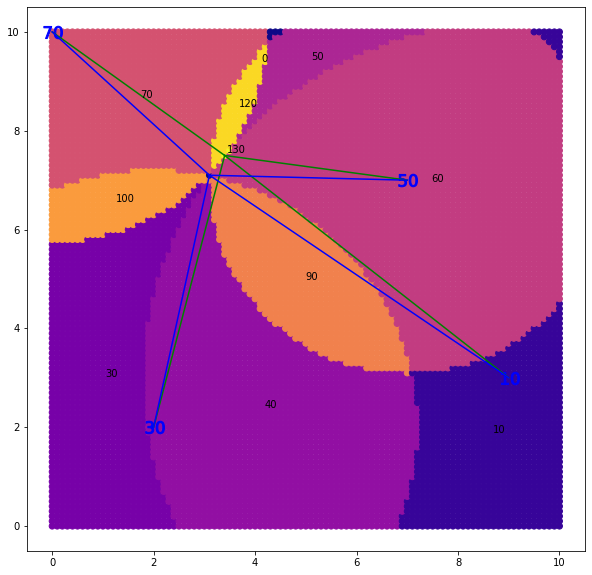

In [33]:
################################## Calculating Best Position for 2nd Player ########################################

# calculate the distance to each group of people from player A's best position
distanceToA = []
for i in range(len(peopleX)):
    d = distance(bestXA, bestYA, peopleX[i], peopleY[i])
    distanceToA.append(d)
    
# store the best score and coordinates
maxi = 0
bestX = 0
bestY = 0

increment = 0.1

# coordinate points to iterate through
xVals = np.arange(0.0, dimX+increment, increment)
yVals = np.arange(0.0, dimY+increment, increment) 

# list to store the scores and also coordinates of each point
sumsB = []
xiB = []
yiB = []

# dictionary where the key is the score and the value is the list of coordinates with that score
scoreX = {} 
scoreY = {}

# iterate through all of the coordinates to calculate scores
for x in xVals:
    for y in yVals:
        
        total = 0
        
        for i in range(len(peopleX)):
            d = distance(x, y, peopleX[i], peopleY[i])
            if (d < distanceToA[i]):
                total = total + peopleSize[i]
                
        xiB.append(x)
        yiB.append(y)
        sumsB.append(total)
        
        
        keys = list(scoreX.keys())
        if (keys.count(total)==0):
            scoreX.update({total:[]})
            scoreY.update({total:[]})

        scoreX[total].append(x)
        scoreY[total].append(y)
        
        if (total > maxi):
            maxi = total
            bestXB = x;
            bestYB = y;

print (str(bestXB) + ", " + str(bestYB))

#################################################### Plotting #####################################################

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

# normalized_sums = [round(i/min(sumsB),2) for i in sumsB]

ax.scatter(xiB, yiB, c=sumsB, cmap="plasma") # plot the actual colormap


# plot the lines to the people markers
for i in range (numPeople):
    x = [bestXB, peopleX[i]]
    y = [bestYB, peopleY[i]]
    
    plt.plot(x, y, 'g-')
    
for i in range (numPeople):
    x = [bestXA, peopleX[i]]
    y = [bestYA, peopleY[i]]
    
    plt.plot(x, y, 'b-')

#################################### Plotting the score markers

keys = list(scoreX.keys())

for k in keys:
    avgX = sum(scoreX[k])/len(scoreX[k])
    avgY = sum(scoreY[k])/len(scoreY[k])
    scoreX[k] = avgX
    scoreY[k] = avgY
    

for k in keys:
    ax.annotate(k, (scoreX[k], scoreY[k]))
    
#################################### Plot the people markers and best position markers

for i in range (len(peopleSize)):
    plt.scatter(peopleX[i], peopleY[i], marker=sizeMarker[i], s = 400, c = 'b')

# plt.scatter(bestXA, bestYA, marker = '$A$', s = 200, c = 'r')
# plt.scatter(bestXB, bestYB, marker = '$B$', s = 200, c = 'g')

    
plt.show()

In [ ]:
#issue: wanna minimize for distance but wanna maximize for people... (the positions in the middle should be optimal)

In [ ]:
#next thing to try: 1. when calculating scores for the second player, 
#only use distance to determine if you get the points or not, don't factor into the actual calculation of score
#should result in patches of different colors in the visualization
# 2. expand the graph above to be 15 x 15 but keep the same coordinates, just to see the colors/patterns
# far away from the groups of ppl.
# 3. put weights on each of the "vendors" that represents how good it is

3.5, 7.7


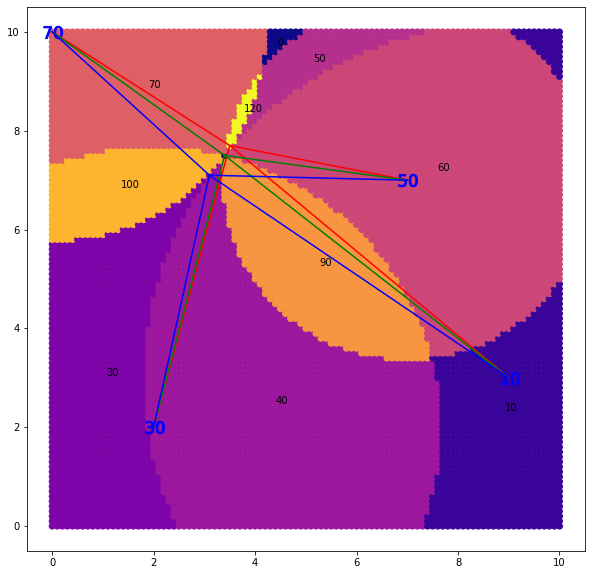

In [34]:
################################## Calculating Best Position for 3rd Player ########################################

# calculate the distance to each group of people from player A's best position
distanceToB = []
for i in range(len(peopleX)):
    d = distance(bestXB, bestYB, peopleX[i], peopleY[i])
    distanceToB.append(d)
    
# store the best score and coordinates
maxi = 0
bestX = 0
bestY = 0

increment = 0.1

# coordinate points to iterate through
xVals = np.arange(0.0, dimX+increment, increment)
yVals = np.arange(0.0, dimY+increment, increment) 

# list to store the scores and also coordinates of each point
sumsC = []
xiC = []
yiC = []

# dictionary where the key is the score and the value is the list of coordinates with that score
scoreX = {} 
scoreY = {}

# iterate through all of the coordinates to calculate scores
for x in xVals:
    for y in yVals:
        
        total = 0
        
        for i in range(len(peopleX)):
            d = distance(x, y, peopleX[i], peopleY[i])
            if (d < distanceToB[i]):
                total = total + peopleSize[i]
                
        xiC.append(x)
        yiC.append(y)
        sumsC.append(total)
        
        
        keys = list(scoreX.keys())
        if (keys.count(total)==0):
            scoreX.update({total:[]})
            scoreY.update({total:[]})

        scoreX[total].append(x)
        scoreY[total].append(y)
        
        if (total > maxi):
            maxi = total
            bestXC = x;
            bestYC = y;

print (str(bestXC) + ", " + str(bestYC))

#################################################### Plotting #####################################################

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

# normalized_sums = [round(i/min(sumsB),2) for i in sumsB]

ax.scatter(xiC, yiC, c=sumsC, cmap="plasma") # plot the actual colormap


# plot the lines to the people markers
for i in range (numPeople):
    x = [bestXC, peopleX[i]]
    y = [bestYC, peopleY[i]]
    
    plt.plot(x, y, 'r-')

for i in range (numPeople):
    x = [bestXB, peopleX[i]]
    y = [bestYB, peopleY[i]]
    
    plt.plot(x, y, 'g-')
    
for i in range (numPeople):
    x = [bestXA, peopleX[i]]
    y = [bestYA, peopleY[i]]
    
    plt.plot(x, y, 'b-')

#################################### Plotting the score markers

keys = list(scoreX.keys())

for k in keys:
    avgX = sum(scoreX[k])/len(scoreX[k])
    avgY = sum(scoreY[k])/len(scoreY[k])
    scoreX[k] = avgX
    scoreY[k] = avgY
    

for k in keys:
    ax.annotate(k, (scoreX[k], scoreY[k]))
    
#################################### Plot the people markers and best position markers

for i in range (len(peopleSize)):
    plt.scatter(peopleX[i], peopleY[i], marker=sizeMarker[i], s = 400, c = 'b')

# plt.scatter(bestXA, bestYA, marker = '$A$', s = 200, c = 'r')
# plt.scatter(bestXB, bestYB, marker = '$B$', s = 200, c = 'g')

    
plt.show()